In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data=pd.read_csv('pre_processed_data.csv')

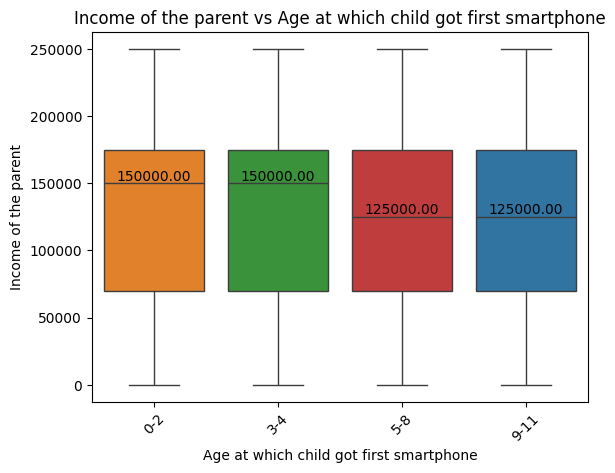

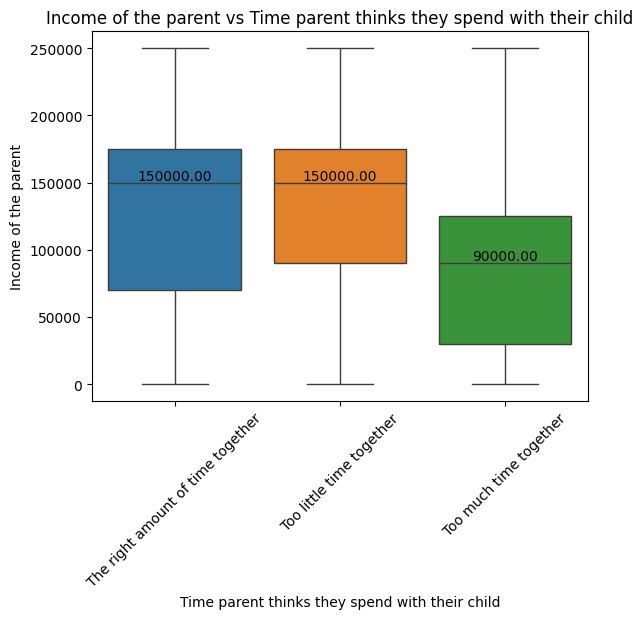

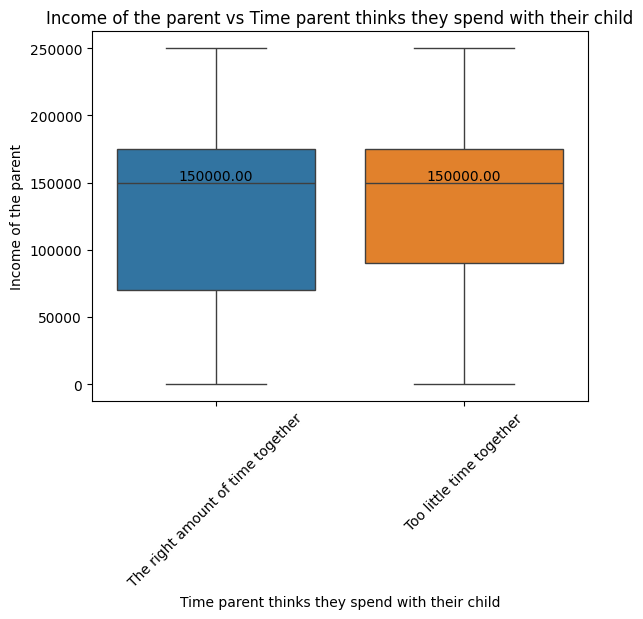

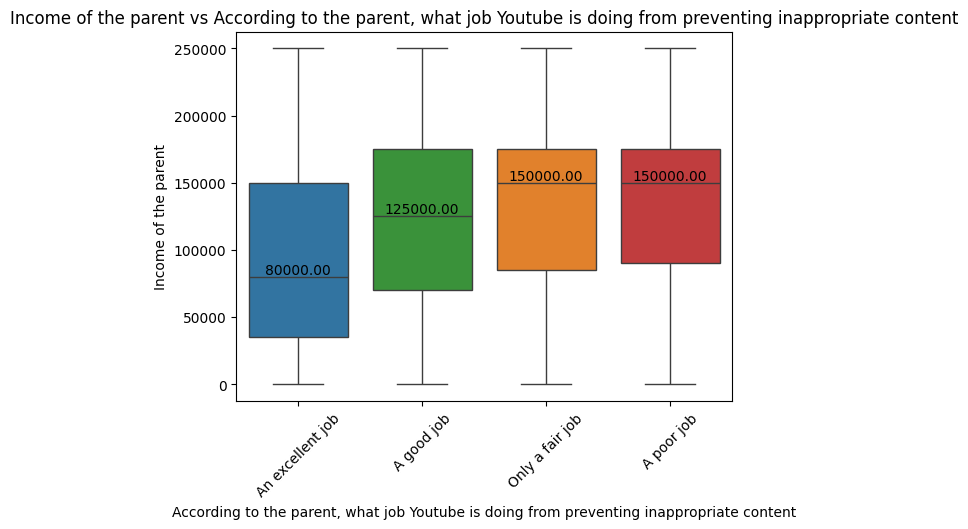

In [30]:
def plot_boxplot(data, column1, column2, column1_name, column2_name):
    '''
    Plots a boxplot for column1 and column2
    
    args- 
    data: Dataframe containing the whole data
    column1: Column name of the y-axis
    column2: Column name of the x-axis
    column1_name: Label for y-axis
    column2_name: Label for x-axis
    returns - 
    None
    Displays a boxplot
    '''
    filtered_df = data[(data[column1] != 'Refused') & (data[column2] != 'Refused')]
    filtered_df = filtered_df[~filtered_df[column2].isnull()]
    sorted_values = filtered_df[column2].sort_values().unique()

    if column2 == 'YT_preventing_inappropriate':
        sorted_values = [
            "An excellent job",
            "A good job",
            "Only a fair job",
            "A poor job"
        ]

    sns.boxplot(y=column1, x=column2, data=filtered_df, hue=column2, legend=False, order=sorted_values)
    for i, box in enumerate(sorted_values):
        vals = filtered_df[filtered_df[column2] == box][column1]
        median_val = vals.median()
        plt.text(i, median_val, f'{median_val:.2f}', ha='center', va='bottom', fontdict={'fontsize': 10})
    plt.ylabel(column1_name)
    plt.xlabel(column2_name)
    plt.xticks(rotation=45)
    plt.title(f'{column1_name} vs {column2_name}')
    plt.savefig(f'{column1_name}_vs_{column2_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_boxplot(data, 'P_income', 'Child_first_age_smartphone','Income of the parent','Age at which child got first smartphone')
plot_boxplot(data, 'P_income', 'As_a_parent_your_job_is','Income of the parent','Time parent thinks they spend with their child')
filtered_df = data[(data['P_income'] != 'Refused') & (data['As_a_parent_your_job_is'] != 'Refused') & (data['As_a_parent_your_job_is'] != 'Too much time together')]
plot_boxplot(filtered_df, 'P_income', 'As_a_parent_your_job_is','Income of the parent','Time parent thinks they spend with their child')
plot_boxplot(data, 'P_income', 'YT_preventing_inappropriate','Income of the parent','According to the parent, what job Youtube is doing from preventing inappropriate content')
    

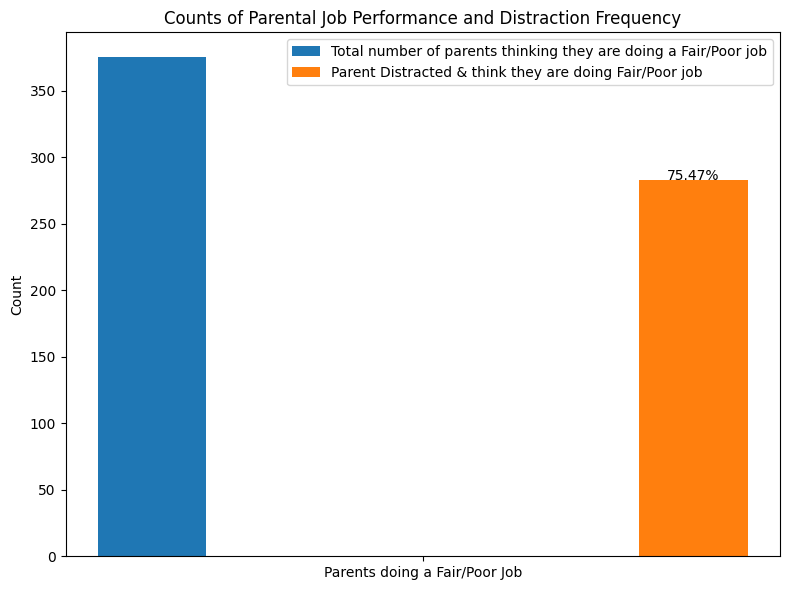

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_job_performance_and_distraction(data):
    """
    Plot the counts of parental job performance and distraction frequency.

    args -:
    data: DataFrame containing columns 'How_often_distracted' and 'Time_spent_together'

    Returns:
    (none)
    displays the plot
    """

    condition_total_fair_poor = data[data['Time_spent_together'].isin(['Only a fair job', 'A poor job'])]
    condition_distracted_fair_poor = condition_total_fair_poor[condition_total_fair_poor['How_often_distracted'].isin(['Often', 'Sometimes'])]

    count_total_fair_poor = condition_total_fair_poor.shape[0]
    count_distracted_fair_poor = condition_distracted_fair_poor.shape[0]

    percent_distracted_fair_poor = count_distracted_fair_poor / condition_total_fair_poor.shape[0] * 100

    plt.figure(figsize=(8, 6))

    bar_width = 0.2
    index = [1, 2]

    plt.bar(index[0], count_total_fair_poor, bar_width, label='Total number of parents thinking they are doing a Fair/Poor job')
    plt.bar(index[1], count_distracted_fair_poor, bar_width, label='Parent Distracted & think they are doing Fair/Poor job')
    

    plt.text(index[1], count_distracted_fair_poor , f'{percent_distracted_fair_poor:.2f}%', ha='center')

    plt.ylabel('Count')
    plt.title('Counts of Parental Job Performance and Distraction Frequency')
    plt.xticks([1.5], [ 'Parents doing a Fair/Poor Job'])
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_job_performance_and_distraction(data)